In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
iris = datasets.load_iris()
digits = datasets.load_digits()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd

In [ ]:
digits

In [ ]:
df1 = pd.DataFrame(digits.target)
df1

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


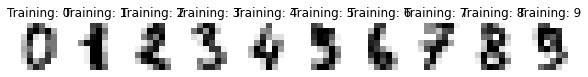

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df,df1,test_size = 0.2)


In [ ]:
clf = svm.SVC(gamma=0.001)
neigh = KNeighborsClassifier(n_neighbors=3)


In [ ]:
clf.fit(X_train, Y_train)
neigh.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
predicted = clf.predict(X_test)
predicted1 = neigh.predict(X_test)

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print(mean_absolute_error(predicted, Y_test[0].tolist()) )
print(mean_absolute_error(predicted1, Y_test[0].tolist()) )

0.05
0.09166666666666666


In [ ]:
confusion_matrix(predicted, Y_test[0].tolist()) 

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  1,  0, 39]])

In [ ]:
confusion_matrix(predicted1, Y_test[0].tolist()) 

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0, 36]])

In [ ]:
predicted[:5]

array([4, 5, 2, 1, 0])

In [ ]:
Y_test[0].tolist()[:5]

[4, 5, 2, 1, 0]

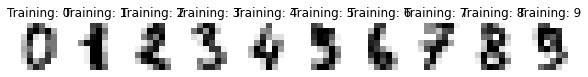

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.4 MB 37 kB/s 
     |████████████████████████████████| 371 kB 70.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import catboost

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df,df1,test_size = 0.1)
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.1)

In [ ]:
train_pool = catboost.Pool(
    x_train,
    label=y_train
    
)
val_pool = catboost.Pool(
    x_val,
    label=y_val
)
test_pool = catboost.Pool(
    X_test,
    label=Y_test
)

In [ ]:
!rm -rf 'catboost_clf_on_adult/snapshot.bkp'

In [ ]:
catboost_train_dir = 'catboost_clf_on_adult'
clf = catboost.CatBoostClassifier(
    eval_metric='Accuracy',
    od_pval=0.05,
    od_wait=20,
    # early_stopping_rounds=20,
    random_seed=28,
    train_dir=catboost_train_dir,
    task_type='CPU',
    # task_type='GPU',
    # devices='0',
    auto_class_weights='Balanced',
    max_ctr_complexity=4,
    use_best_model=True
)
clf.fit(
    train_pool, 
    eval_set=val_pool,
    plot=True,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
)

In [ ]:
predicted_cat = clf.predict(X_test)

In [ ]:
print(mean_absolute_error(predicted_cat, Y_test[0].tolist()) )
print(confusion_matrix(predicted_cat, Y_test[0].tolist()) )

0.05
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  1  1  0  0  0 21]]


In [ ]:
test_metrics = clf.eval_metrics(
    test_pool,
    metrics=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1'],
    ntree_start=clf.best_iteration_ - 1,
    ntree_end=clf.best_iteration_,
    eval_period=1,
    thread_count=-1
)
test_metrics

{'AUC:type=Mu': [1.0],
 'Accuracy': [0.9888577029015108],
 'F1:class=0': [1.0],
 'F1:class=1': [1.0],
 'F1:class=2': [1.0],
 'F1:class=3': [1.0],
 'F1:class=4': [0.9714285714285714],
 'F1:class=5': [0.9787234042553191],
 'F1:class=6': [1.0],
 'F1:class=7': [1.0],
 'F1:class=8': [1.0],
 'F1:class=9': [0.9560036668206229],
 'Precision:class=0': [1.0],
 'Precision:class=1': [1.0],
 'Precision:class=2': [1.0],
 'Precision:class=3': [1.0],
 'Precision:class=4': [1.0],
 'Precision:class=5': [1.0],
 'Precision:class=6': [1.0],
 'Precision:class=7': [1.0],
 'Precision:class=8': [1.0],
 'Precision:class=9': [0.9157155407904719],
 'Recall:class=0': [1.0],
 'Recall:class=1': [1.0],
 'Recall:class=2': [1.0],
 'Recall:class=3': [1.0],
 'Recall:class=4': [0.9444444444444444],
 'Recall:class=5': [0.9583333333333334],
 'Recall:class=6': [1.0],
 'Recall:class=7': [1.0],
 'Recall:class=8': [1.0],
 'Recall:class=9': [1.0]}

In [ ]:
from sklearn import tree

In [ ]:
tre = tree.DecisionTreeClassifier()
tre.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicted_tre = tre.predict(X_test)
print(mean_absolute_error(predicted_tre, Y_test[0].tolist()) )
print(confusion_matrix(predicted_tre, Y_test[0].tolist()) )

0.5833333333333334
[[22  0  0  0  1  0  0  0  0  2]
 [ 0 10  0  0  1  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  2  1  1]
 [ 1  1  0  0 13  0  1  0  1  1]
 [ 0  0  0  1  0 23  0  0  0  1]
 [ 0  0  1  0  1  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  1]
 [ 0  0  0  0  1  0  0  0 12  0]
 [ 0  0  0  1  1  1  0  1  1 15]]


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
m = 1
for i in range(1,40):
  for _ in range(20):
    tre = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy',splitter = 'random',class_weight = 'balanced')
    tre.fit(X_train, Y_train)
    predicted_tre = tre.predict(X_test)
    err = mean_absolute_error(predicted_tre, Y_test[0].tolist())
    if err < m:
      best = tre
      m = err
predicted_tre = best.predict(X_test)
print(mean_absolute_error(predicted_tre, Y_test[0].tolist()))


0.12777777777777777


In [ ]:
print(roc_auc_score(Y_test[0].tolist(),predicted_tre ) )

ValueError: ignored

In [ ]:
print(confusion_matrix(predicted_tre, Y_test[0].tolist()) )

[[22  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  1  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  1  0]
 [ 1  0  0  1 17  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  1]
 [ 0  0  0  0  0  0 20  1  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 15  1]
 [ 0  0  0  0  1  1  0  0  0 19]]


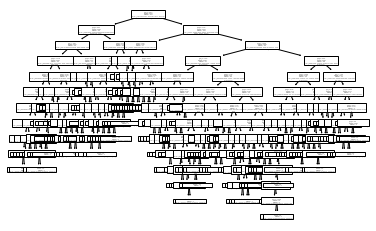

In [ ]:
tree.plot_tree(best) 

In [ ]:
pip install graphviz

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(tre, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

In [ ]:
graph

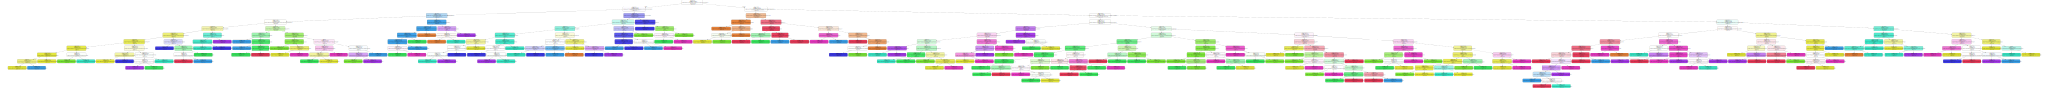

In [ ]:
dot_data = tree.export_graphviz(best, out_file=None, 
                       
                      class_names=list(map(str,Y_test[0].tolist())),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
print(True / 2)